<a href="https://colab.research.google.com/github/mart-anthony-stark/Machine-Learning-and-Deep-Learning/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Failure Prediction
Dataset source: https://www.kaggle.com/datasets/rithikkotha/heart-failure-clinical-records-dataset

# Importing libraries and loading dataset

In [8]:
import numpy as np
import pandas as pd

import missingno
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Exploring data

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df.shape

(299, 13)

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


## Check for missing/invalid values

In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

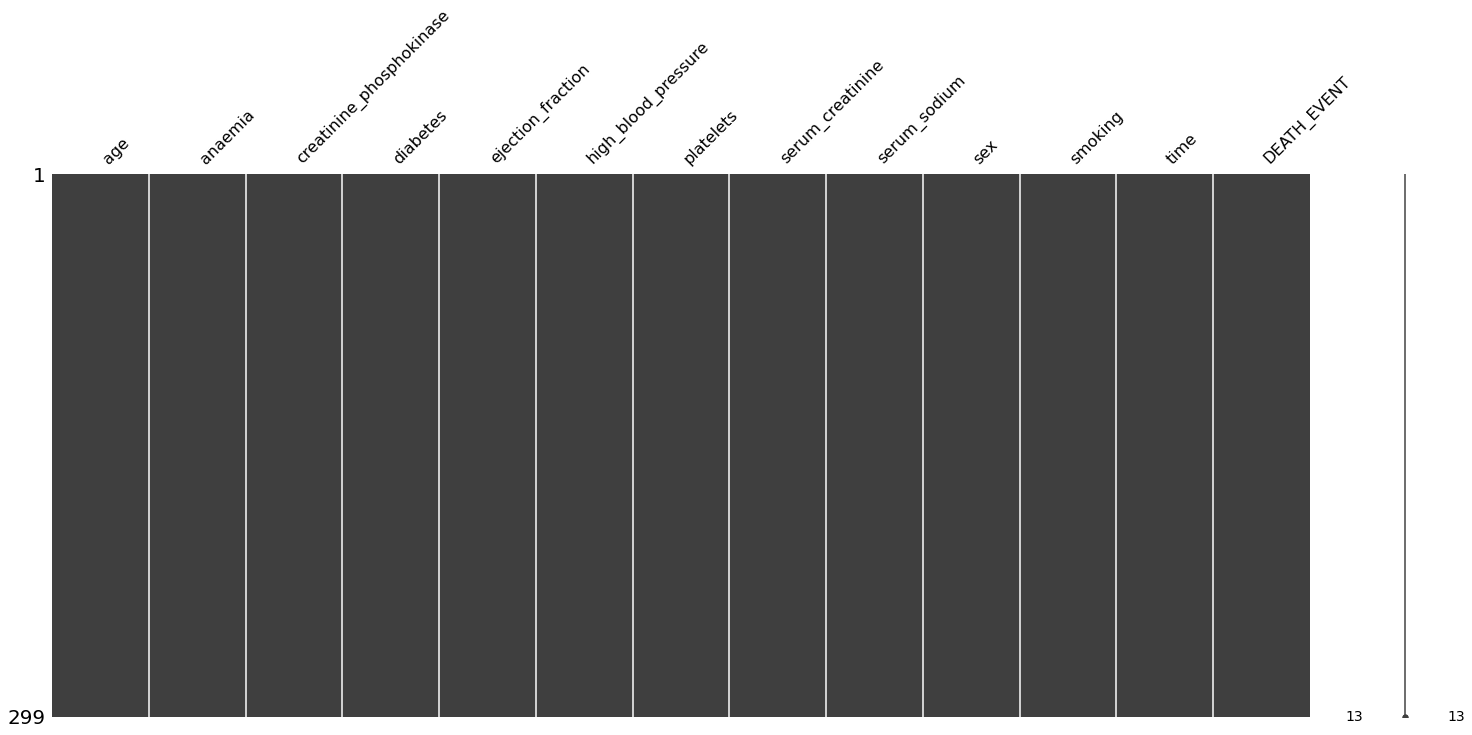

In [9]:
missingno.matrix(df)

# Exploratory data analysis

In [11]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

## Check proportions of living and dead records

Total living cases:  203
Total died cases:  96


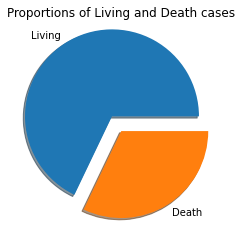

In [20]:
living = len(df[df['DEATH_EVENT'] == 0])
death = len(df[df['DEATH_EVENT'] == 1])

pie_arr = np.array([living, death])

print("Total living cases: ", living)
print("Total died cases: ", death)

# Visualize the proportion
plt.pie(pie_arr, labels=['Living', 'Death'], explode = [0.2,0.0] , shadow=True)
plt.title("Proportions of Living and Death cases")
plt.show()

## Age distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


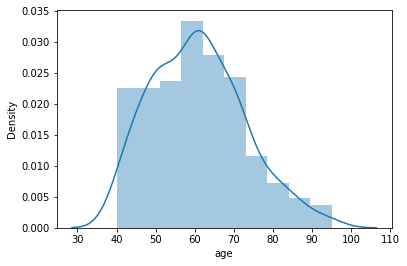

In [23]:
sns.distplot(df['age'])
plt.show()

## Analyzing living and died cases of age 50 and above

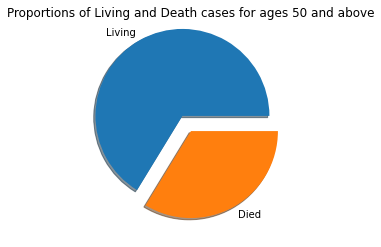

Total living cases:  167
Total died cases:  85


In [29]:
age50 = df[df['age'] >= 50]
living_50 = len(age50[age50['DEATH_EVENT'] == 0])
death_50 = len(age50[age50['DEATH_EVENT'] == 1])

pie_arr = np.array([living_50, death_50])

plt.pie(pie_arr, labels=['Living', 'Died'], explode=[0.2,0.0], shadow=True)
plt.title('Proportions of Living and Death cases for ages 50 and above')
plt.show()

print("Total living cases: ", living_50)
print("Total died cases: ", death_50)

## Analyzing cases with diabetes

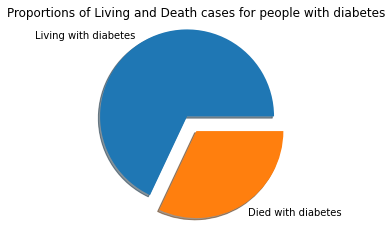

Total living cases:  85
Total died cases:  40


In [32]:
diabetes = df[df['diabetes'] == 1]
living = len(diabetes[diabetes['DEATH_EVENT'] == 0])
death = len(diabetes[diabetes['DEATH_EVENT'] == 1])

pie_arr = np.array([living, death])

plt.pie(pie_arr, labels=['Living with diabetes', 'Died with diabetes'], explode=[0.2,0.0], shadow=True)
plt.title('Proportions of Living and Death cases for people with diabetes')
plt.show()

print("Total living cases: ", living)
print("Total died cases: ", death)

## Correlation matrix

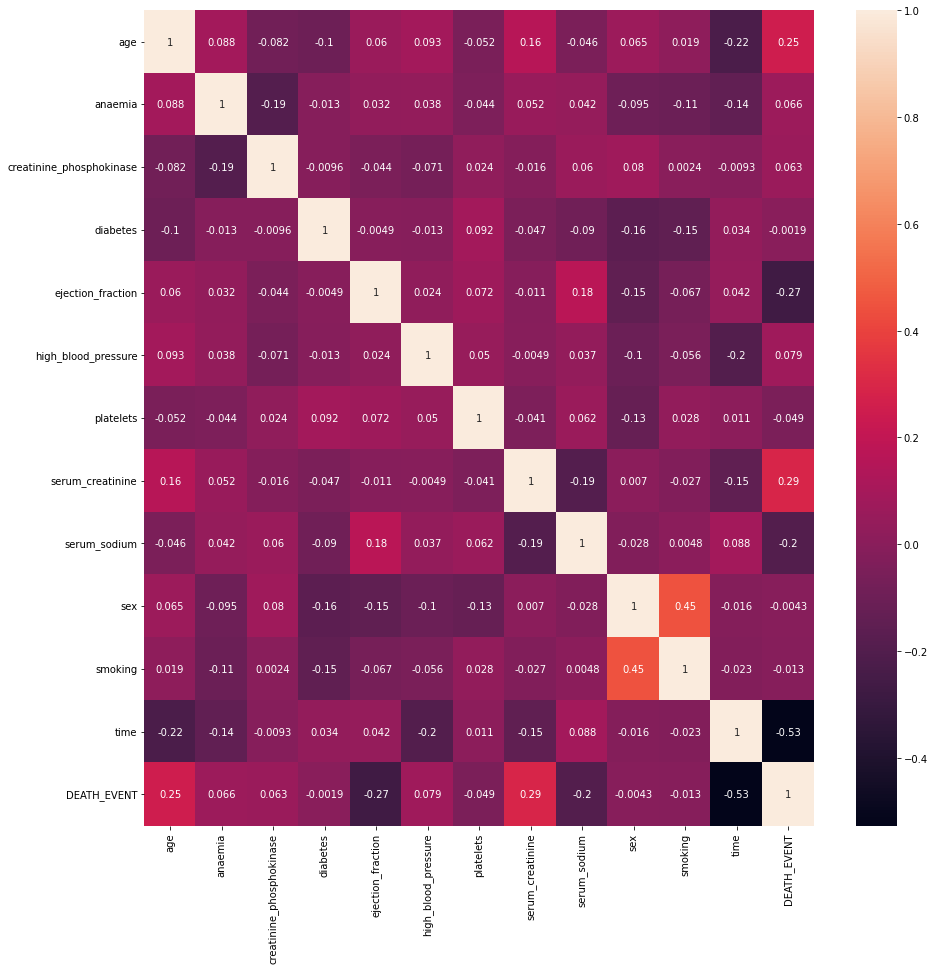

In [38]:
corr = df.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

In [40]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


# Model/Dataset Development

In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


In [50]:
print("Training dataset:",[X_train.shape, y_train.shape])
print("Testing dataset:",[X_test.shape, y_test.shape])

Training dataset: [(239, 12), (239,)]
Testing dataset: [(60, 12), (60,)]


# Feature Engineering (Interaction Terms)
We will add interaction terms, interaction terms are the product of two features, so below is the function prepared for interaction terms.

In [52]:
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)

    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = X[feature_i_name]
        
        for j in range(i+1, m):
            
            feature_j_name = features[j]
            feature_j_data = X[feature_j_name]
            feature_i_j_name = feature_i_name+"_x_"+feature_j_name
            X_int[feature_i_j_name] =  feature_i_data * feature_j_data
        
    return X_int 


x_train_mod = add_interactions(X_train) 
x_test_mod  = add_interactions(X_test)

In [53]:
x_train_mod.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,...,149.6,1.1,0.0,6.6,136,0,816,0,6,0
90,70.0,0,66,1,45,0,249000.00,0.8,136,1,...,108.8,0.8,0.8,64.0,136,136,10880,1,80,80
11,62.0,0,231,0,25,1,253000.00,0.9,140,1,...,126.0,0.9,0.9,9.0,140,140,1400,1,10,10
42,70.0,0,571,1,45,1,185000.00,1.2,139,1,...,166.8,1.2,1.2,39.6,139,139,4587,1,33,33
62,55.0,0,109,0,35,0,254000.00,1.1,139,1,...,152.9,1.1,1.1,66.0,139,139,8340,1,60,60
